<a href="https://colab.research.google.com/github/Marcellecarol/datascience_alura_project1/blob/main/Challenge_Alura_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Caminho dos arquivos
caminho = '/content/drive/MyDrive/Colab Notebooks/challenge1-data-science-main/base-de-dados-challenge-1/'

# Carregando os dados
loja1 = pd.read_csv(caminho + 'loja_1.csv')
loja2 = pd.read_csv(caminho + 'loja_2.csv')
loja3 = pd.read_csv(caminho + 'loja_3.csv')
loja4 = pd.read_csv(caminho + 'loja_4.csv')

# Adicionando identificação de loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenando tudo
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# -----------------------------------------------------
# 1. 📈 Faturamento total por loja
# -----------------------------------------------------
faturamento = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print("Faturamento total por loja (R$):\n", faturamento)

# -----------------------------------------------------
# 2. 🏷️ Categorias mais populares por loja
# -----------------------------------------------------
print("\nCategorias mais vendidas por loja:")
for loja in df['Loja'].unique():
    top_cat = df[df['Loja'] == loja]['Categoria do Produto'].value_counts().nlargest(3)
    print(f"\n{loja}:\n{top_cat}")

# -----------------------------------------------------
# 3. 🌟 Média de avaliação dos clientes por loja
# -----------------------------------------------------
avaliacoes = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nMédia de avaliação por loja:\n", avaliacoes.round(2))

# -----------------------------------------------------
# 4. 🔝 Produtos mais e menos vendidos por loja
# -----------------------------------------------------
print("\nProdutos mais e menos vendidos por loja:")
for loja in df['Loja'].unique():
    dados_loja = df[df['Loja'] == loja]['Produto'].value_counts()
    print(f"\n{loja} - Mais vendido: {dados_loja.idxmax()} ({dados_loja.max()} vendas)")
    print(f"{loja} - Menos vendido: {dados_loja.idxmin()} ({dados_loja.min()} venda)")

# -----------------------------------------------------
# 5. 🚚 Custo médio de frete por loja
# -----------------------------------------------------
frete_medio = df.groupby('Loja')['Frete'].mean().sort_values()
print("\nCusto médio de frete por loja (R$):\n", frete_medio.round(2))




Faturamento total por loja (R$):
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Categorias mais vendidas por loja:

Loja 1:
Categoria do Produto
moveis         465
eletronicos    448
brinquedos     324
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis         442
eletronicos    422
brinquedos     313
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis         499
eletronicos    451
brinquedos     315
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis         480
eletronicos    451
brinquedos     338
Name: count, dtype: int64

Média de avaliação por loja:
 Loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliação da compra, dtype: float64

Produtos mais e menos vendidos por loja:

Loja 1 - Mais vendido: Micro-ondas (60 vendas)
Loja 1 - Menos vendido: Headset (33 venda)

Loja 2 - Mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Menos vendido: Jogo 

In [44]:
# Listar categorias únicas por loja
for loja in df['Loja'].unique():
    categorias = df[df['Loja'] == loja]['Categoria do Produto'].unique()
    print(f'\n📦 Categorias na {loja}:')
    for cat in categorias:
        print(f' - {cat}')

# Listar os produtos únicos por loja (opcional, apenas se quiser detalhes)
# Exemplo com Loja 1:
produtos_loja1 = df[df['Loja'] == 'Loja 1']['Produto'].unique()
print(f'\n🛍 Produtos na Loja 1 ({len(produtos_loja1)} diferentes):')
print(produtos_loja1)



📦 Categorias na Loja 1:
 - eletronicos
 - moveis
 - brinquedos
 - eletrodomesticos
 - utilidades domesticas
 - esporte e lazer
 - livros
 - instrumentos musicais

📦 Categorias na Loja 2:
 - moveis
 - instrumentos musicais
 - esporte e lazer
 - eletronicos
 - utilidades domesticas
 - brinquedos
 - eletrodomesticos
 - livros

📦 Categorias na Loja 3:
 - eletrodomesticos
 - moveis
 - instrumentos musicais
 - esporte e lazer
 - eletronicos
 - brinquedos
 - utilidades domesticas
 - livros

📦 Categorias na Loja 4:
 - eletrodomesticos
 - moveis
 - esporte e lazer
 - livros
 - eletronicos
 - instrumentos musicais
 - brinquedos
 - utilidades domesticas

🛍 Produtos na Loja 1 (51 diferentes):
['Assistente virtual' 'Mesa de jantar' 'Jogo de tabuleiro' 'Micro-ondas'
 'Cadeira de escritório' 'Blocos de montar' 'Boneca bebê' 'Lava louças'
 'Lavadora de roupas' 'Carrinho controle remoto' 'Geladeira'
 'Fone de ouvido' 'Panela de pressão' 'Bicicleta'
 'Ciência de dados com python' 'Bola de vôlei' 'Xadre

<ipython-input-47-aac42c0eded3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento.index, y=faturamento.values, palette='Blues_d')


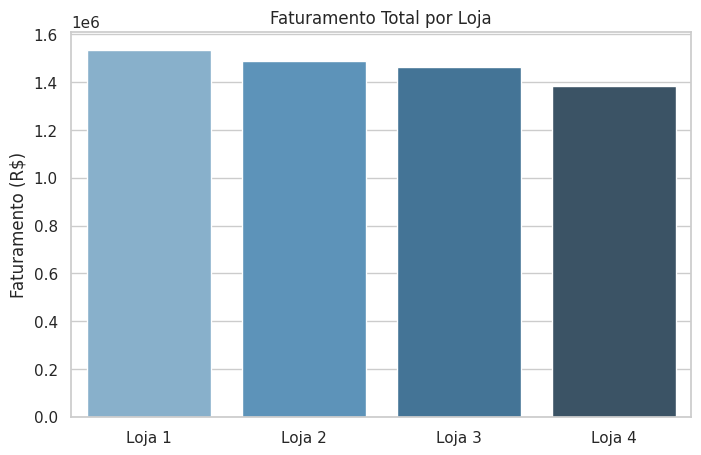

<ipython-input-47-aac42c0eded3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes.index, y=avaliacoes.values, palette='Greens_d')


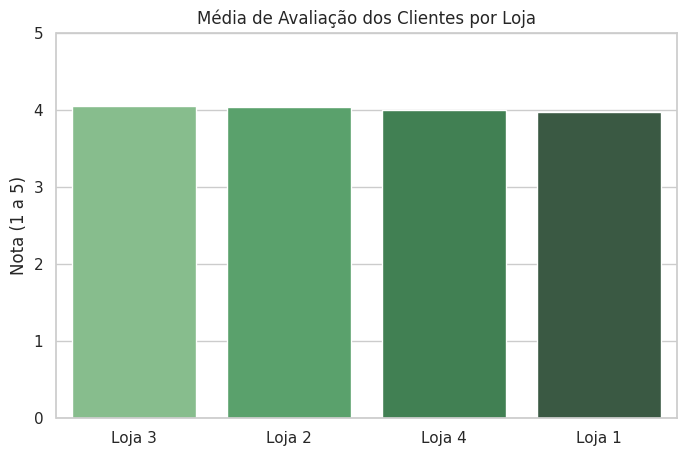

<ipython-input-47-aac42c0eded3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frete_medio.index, y=frete_medio.values, palette='Oranges_d')


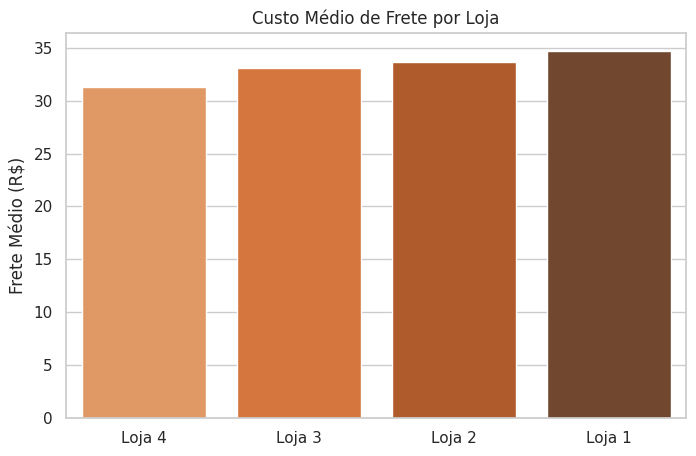

<ipython-input-47-aac42c0eded3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='Set2')


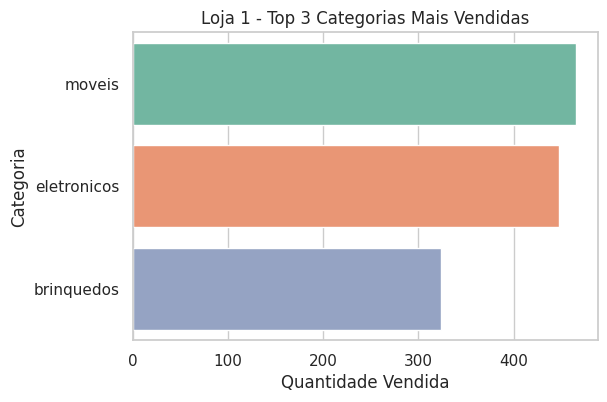

<ipython-input-47-aac42c0eded3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='Set2')


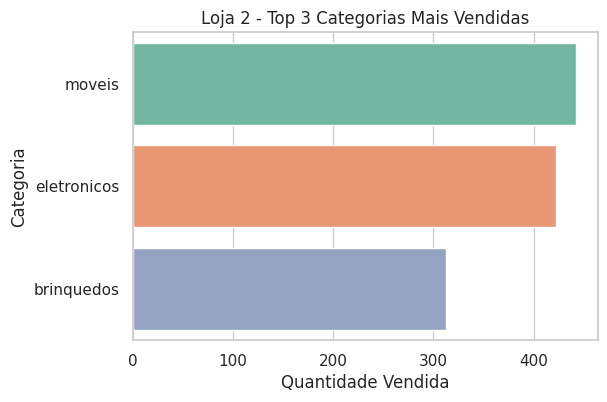

<ipython-input-47-aac42c0eded3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='Set2')


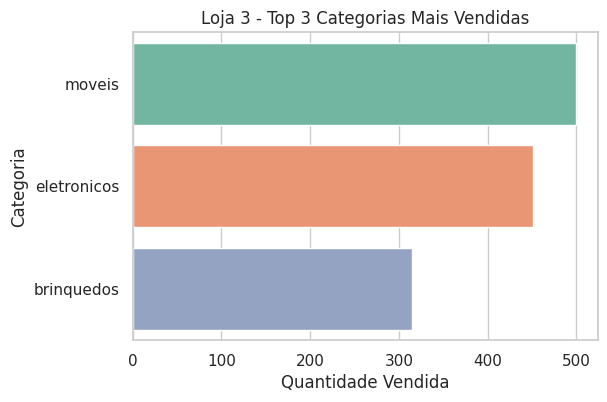

<ipython-input-47-aac42c0eded3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='Set2')


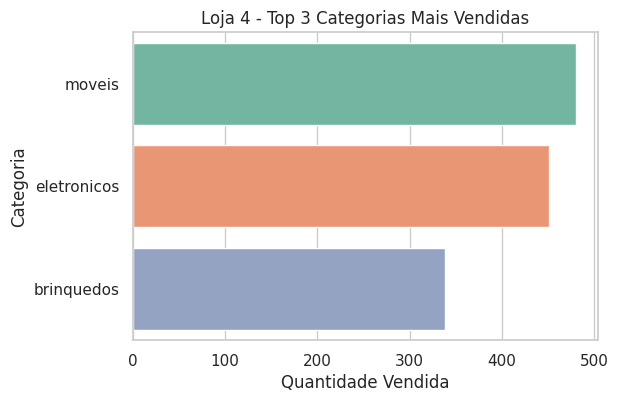

<ipython-input-47-aac42c0eded3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prod.values, y=top_prod.index, palette='Set3')


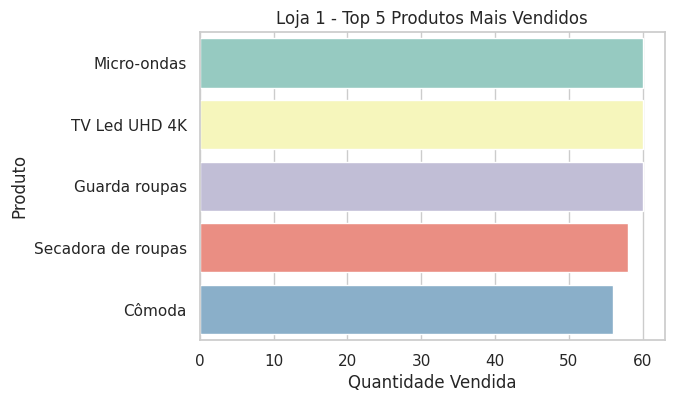

<ipython-input-47-aac42c0eded3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prod.values, y=top_prod.index, palette='Set3')


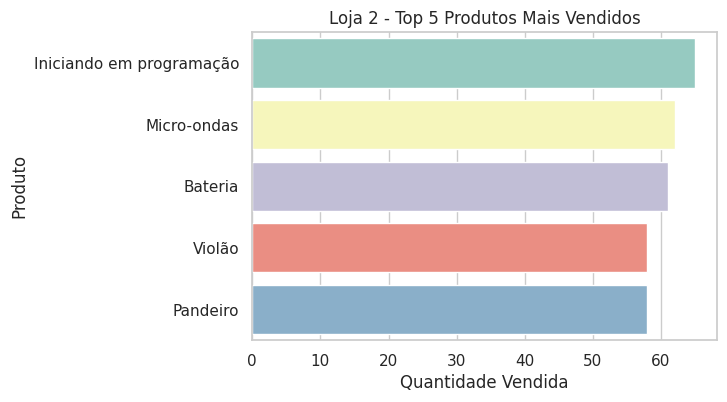

<ipython-input-47-aac42c0eded3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prod.values, y=top_prod.index, palette='Set3')


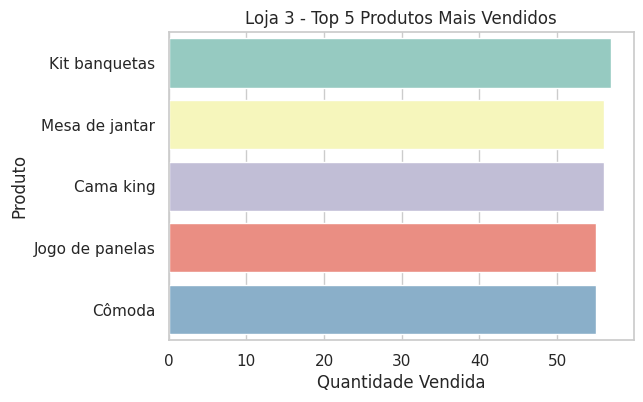

<ipython-input-47-aac42c0eded3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prod.values, y=top_prod.index, palette='Set3')


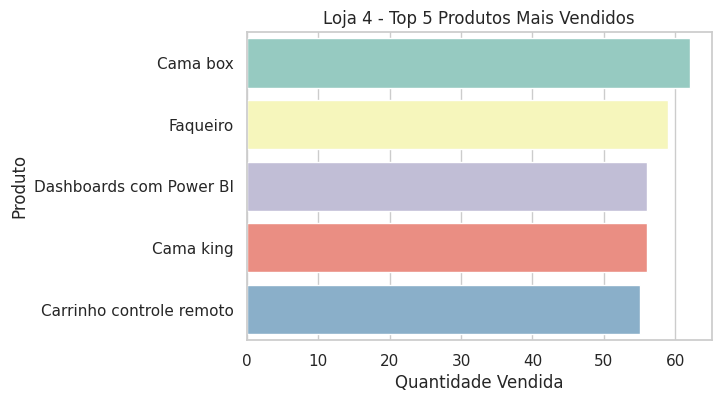

In [47]:
# Gráfico 1: Faturamento total por loja
plt.figure(figsize=(8, 5))
sns.barplot(x=faturamento.index, y=faturamento.values, palette='Blues_d')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('')
plt.show()

# Gráfico 2: Média de avaliação dos clientes
plt.figure(figsize=(8, 5))
sns.barplot(x=avaliacoes.index, y=avaliacoes.values, palette='Greens_d')
plt.title('Média de Avaliação dos Clientes por Loja')
plt.ylabel('Nota (1 a 5)')
plt.xlabel('')
plt.ylim(0, 5)
plt.show()

# Gráfico 3: Custo médio de frete
plt.figure(figsize=(8, 5))
sns.barplot(x=frete_medio.index, y=frete_medio.values, palette='Oranges_d')
plt.title('Custo Médio de Frete por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('')
plt.show()

# Gráfico 4: Categorias mais populares por loja (top 3)
for loja in df['Loja'].unique():
    top_cat = df[df['Loja'] == loja]['Categoria do Produto'].value_counts().nlargest(3)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_cat.values, y=top_cat.index, palette='Set2')
    plt.title(f'{loja} - Top 3 Categorias Mais Vendidas')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Categoria')
    plt.show()

# Gráfico 5: Produtos mais vendidos por loja (top 5)
for loja in df['Loja'].unique():
    top_prod = df[df['Loja'] == loja]['Produto'].value_counts().nlargest(5)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_prod.values, y=top_prod.index, palette='Set3')
    plt.title(f'{loja} - Top 5 Produtos Mais Vendidos')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Produto')
    plt.show()



# 📊 **Relatório Final de Análise das Lojas**

## 1. **Resumo** 📝

Foram analisadas 4 lojas com base nas seguintes métricas:
- Faturamento total 💰
- Média de avaliação dos clientes ⭐
- Categorias mais populares 🏷️
- Produtos mais e menos vendidos 🛍️
- Custo médio de frete 🚚

A seguir, detalho as análises realizadas e as conclusões sobre cada uma das métricas.

---

## 2. **Análise das Métricas** 📊

### **2.1 Faturamento Total por Loja (R$)** 💸

| Loja   | Faturamento (R$)    |
|--------|---------------------|
| Loja 1 | 1.534.509,12        |
| Loja 2 | 1.488.459,06        |
| Loja 3 | 1.464.025,03        |
| Loja 4 | 1.384.497,58        |

- **Loja 1** lidera o faturamento, com **R$ 1.534.509,12**, seguida pela **Loja 2** (R$ 1.488.459,06), **Loja 3** (R$ 1.464.025,03) e **Loja 4** (R$ 1.384.497,58).  
- A **Loja 1** apresenta um pequeno vantagem, mas a diferença entre as lojas é relativamente pequena. 📈

### **2.2 Categorias Mais Vendidas por Loja** 🏷️

##### Loja 1:
- **Móveis**: 465 vendas  
- **Eletrônicos**: 448 vendas  
- **Brinquedos**: 324 vendas  

##### Loja 2:
- **Móveis**: 442 vendas  
- **Eletrônicos**: 422 vendas  
- **Brinquedos**: 313 vendas  

##### Loja 3:
- **Móveis**: 499 vendas  
- **Eletrônicos**: 451 vendas  
- **Brinquedos**: 315 vendas  

##### Loja 4:
- **Móveis**: 480 vendas  
- **Eletrônicos**: 451 vendas  
- **Brinquedos**: 338 vendas  

- As categorias mais populares em todas as lojas são **móveis, eletrônicos e brinquedos**. 🛋️📱🧸  
- Não há grandes variações entre as lojas, mas a **Loja 3** tem a maior concentração de vendas em móveis (499 vendas), enquanto a **Loja 2** tem um foco mais equilibrado.

### **2.3 Média de Avaliação por Loja** ⭐

| Loja   | Média de Avaliação (1 a 5) |
|--------|----------------------------|
| Loja 1 | 3.98                       |
| Loja 2 | 4.04                       |
| Loja 3 | 4.05                       |
| Loja 4 | 4.00                       |

- **Loja 3** tem a maior média de avaliação com **4.05**, seguida pela **Loja 2** (4.04).  
- **Loja 1** tem a menor média de avaliação (**3.98**), o que pode indicar uma experiência de compra um pouco menos satisfatória em comparação com as outras. 😕

### **2.4 Produtos Mais e Menos Vendidos por Loja** 🛍️

##### Loja 1:
- **Mais Vendido**: Micro-ondas (60 vendas)  
- **Menos Vendido**: Headset (33 vendas)  

##### Loja 2:
- **Mais Vendido**: Iniciando em Programação (65 vendas)  
- **Menos Vendido**: Jogo de Tabuleiro (32 vendas)  

##### Loja 3:
- **Mais Vendido**: Kit Banquetas (57 vendas)  
- **Menos Vendido**: Blocos de Montar (35 vendas)  

##### Loja 4:
- **Mais Vendido**: Cama Box (62 vendas)  
- **Menos Vendido**: Guitarra (33 vendas)  

- Cada loja tem um produto "estrela" que lidera as vendas, mas também produtos que não geram tantas vendas. 🌟  
- A **Loja 2** se destaca com **Iniciando em Programação** como seu produto mais vendido, indicando que pode ter um foco em itens educativos.

### **2.5 Custo Médio de Frete por Loja (R$)** 🚚

| Loja   | Custo Médio de Frete (R$) |
|--------|---------------------------|
| Loja 4 | 31.28                     |
| Loja 3 | 33.07                     |
| Loja 2 | 33.62                     |
| Loja 1 | 34.69                     |

- O custo médio de frete é mais baixo na **Loja 4** (R$ 31.28), seguida pela **Loja 3** (R$ 33.07).  
- **Loja 1** tem o custo de frete mais alto (**R$ 34.69**), o que pode impactar nas vendas, especialmente em mercados mais sensíveis a custos de envio. 💵

---

## 3. **Conclusão e Recomendação** 🎯

Com base nas métricas analisadas, **recomenda-se a escolha da Loja 3** para vender os produtos, pelas seguintes razões:

- **Faturamento**: A **Loja 3** possui um faturamento alto, apenas atrás da **Loja 1**, e muito próximo da **Loja 2**. 💰
- **Avaliação**: A **Loja 3** tem a maior média de avaliação, indicando uma excelente experiência de compra para os clientes. ⭐
- **Custo de Frete**: Embora não seja a mais barata, a **Loja 3** tem um custo de frete razoável, o que ajuda a manter a competitividade. 🚚
- **Produtos**: A loja tem um bom mix de produtos populares e de sucesso, como o **Kit Banquetas**. 🛍️

Portanto, apesar da **Loja 1** ter o maior faturamento, a **Loja 3** oferece um equilíbrio ideal entre **faturamento, avaliação e custo de frete**, o que a torna uma excelente escolha para o Sr. João. ✅
